In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline

In [31]:
df = pd.read_csv('data/treated_data/TerrestrialReport_lc_ld_mammals.csv',sep="|", dtype='unicode')
df_cat = df.copy()

# Cathegorical data

In [32]:
for col_name in df.columns:
    if(df_cat[col_name].dtype == 'object'):
        df_cat[col_name] = df_cat[col_name].astype('category')
        df_cat[col_name] = df_cat[col_name].cat.codes
        
df_cat[:10]

,CAS Number,Chemical Name,Chemical Grade,Chemical Purity Mean Op,Chemical Purity Mean(%),Chemical Purity Min Op,Chemical Purity Min(%),Chemical Purity Max Op,Chemical Purity Max(%),Species Group,...,Observed Duration Min (Days),Observed Duration Max Op (Days),Observed Duration Max (Days),Observed Duration Units (Days),Author,Reference Number,Title,Source,Publication Year,Unnamed: 65
0,278,297,6,-1,85,-1,6,-1,6,0,...,9,-1,10,0,257,33,181,131,25,-1
1,278,297,6,-1,85,-1,6,-1,6,0,...,9,-1,10,0,257,33,181,131,25,-1
2,278,297,6,-1,85,-1,6,-1,6,0,...,9,-1,10,0,257,33,181,131,25,-1
3,278,297,6,-1,85,-1,6,-1,6,0,...,9,-1,10,0,257,33,181,131,25,-1
4,278,297,6,-1,85,-1,6,-1,6,0,...,9,-1,10,0,257,33,181,131,25,-1
5,278,297,6,-1,85,-1,6,-1,6,0,...,9,-1,10,0,257,33,181,131,25,-1
6,280,37,3,-1,112,-1,6,-1,6,0,...,9,-1,10,0,1,110,254,270,17,-1
7,280,37,3,-1,112,-1,6,-1,6,0,...,9,-1,10,0,1,110,254,270,17,-1
8,280,37,3,-1,112,-1,6,-1,6,0,...,9,-1,10,0,1,110,254,270,17,-1
9,281,133,3,-1,112,-1,6,-1,6,0,...,9,-1,10,0,82,268,209,209,18,-1


In [15]:
list(df_cat)

['CAS Number ',
 ' Chemical Name',
 'Chemical Grade',
 ' Chemical Purity Mean Op ',
 ' Chemical Purity Mean(%) ',
 ' Chemical Purity Min Op ',
 ' Chemical Purity Min(%) ',
 ' Chemical Purity Max Op ',
 ' Chemical Purity Max(%)',
 'Species Group',
 'Species Scientific Name ',
 ' Species Common Name',
 'Organism Lifestage',
 ' Organism Age Mean Op ',
 ' Organism Age Mean ',
 ' Organism Age Min Op ',
 ' Organism Age Min ',
 ' Organism Age Max Op ',
 ' Organism Age Max ',
 ' Organism Age Units',
 'Media Type',
 'Test Location',
 'Exposure Type',
 'Dose Number',
 'Endpoint',
 'Effect',
 'Effect Measurement',
 'Response Site',
 'Chemical Analysis Method',
 'Conc 1 Type (Author) ',
 ' Conc 1 Mean Op (Author) ',
 ' Conc 1 Mean (Author) ',
 ' Conc 1 Min Op (Author) ',
 ' Conc Min 1 (Author) ',
 ' Conc 1 Max Op (Author) ',
 ' Conc 1 Max (Author) ',
 ' Conc 1 Units (Author) ',
 ' Conc 2 Type (Author) ',
 ' Conc 2 Mean Op (Author) ',
 ' Conc 2 Mean (Author) ',
 ' Conc 2 Min Op (Author) ',
 ' Conc 

# PCA data amplitude

With a cathegorical dataframe, there's no point to keep columns whitch values amplitude doesn't bring important insight

In [34]:
df2 = df_cat.drop([
'CAS Number ',
 ' Chemical Name',
 'Chemical Grade',
 'Species Group',
 'Species Scientific Name ',
 ' Species Common Name',
 'Organism Lifestage',
 'Media Type',
 'Test Location',
 'Exposure Type',
 'Response Site',
 'Chemical Analysis Method',
 'Conc 1 Type (Author) ',
 ' Conc 1 Mean Op (Author) ',
 ' Conc 1 Mean (Author) ',
 ' Conc 1 Min Op (Author) ',
 ' Conc Min 1 (Author) ',
 ' Conc 1 Max Op (Author) ',
 ' Conc 1 Max (Author) ',
 ' Conc 1 Units (Author) ',
 ' Conc 2 Type (Author) ',
 ' Conc 2 Mean Op (Author) ',
 ' Conc 2 Mean (Author) ',
 ' Conc 2 Min Op (Author) ',
 ' Conc Min 2 (Author) ',
 ' Conc 2 Max Op (Author) ',
 ' Conc 2 Max (Author) ',
 ' Conc 2 Units (Author) ',
 ' Conc 3 Type (Author) ',
 ' Conc 3 Mean Op (Author) ',
 ' Conc 3 Mean (Author) ',
 ' Conc 3 Min Op (Author) ',
 ' Conc Min 3 (Author) ',
 ' Conc 3 Max Op (Author) ',
 ' Conc 3 Max (Author) ',
 ' Conc 3 Units (Author)',
 'Author ',
 ' Reference Number ',
 ' Title ',
 ' Source ',
 ' Publication Year',
 'Unnamed: 65'], axis=1)

df2[:10]

,Chemical Purity Mean Op,Chemical Purity Mean(%),Chemical Purity Min Op,Chemical Purity Min(%),Chemical Purity Max Op,Chemical Purity Max(%),Organism Age Mean Op,Organism Age Mean,Organism Age Min Op,Organism Age Min,...,Endpoint,Effect,Effect Measurement,Observed Duration Op (Days),Observed Duration (Days),Observed Duration Min Op (Days),Observed Duration Min (Days),Observed Duration Max Op (Days),Observed Duration Max (Days),Observed Duration Units (Days)
0,-1,85,-1,6,-1,6,-1,20,-1,26,...,6,2,2,-1,57,-1,9,-1,10,0
1,-1,85,-1,6,-1,6,-1,20,-1,26,...,6,2,2,-1,57,-1,9,-1,10,0
2,-1,85,-1,6,-1,6,-1,20,-1,26,...,6,2,2,-1,57,-1,9,-1,10,0
3,-1,85,-1,6,-1,6,-1,20,-1,26,...,11,2,2,-1,57,-1,9,-1,10,0
4,-1,85,-1,6,-1,6,-1,20,-1,26,...,11,2,2,-1,57,-1,9,-1,10,0
5,-1,85,-1,6,-1,6,-1,20,-1,26,...,11,2,2,-1,57,-1,9,-1,10,0
6,-1,112,-1,6,-1,6,-1,24,-1,26,...,11,2,2,-1,31,-1,9,-1,10,0
7,-1,112,-1,6,-1,6,-1,24,-1,26,...,11,2,2,-1,31,-1,9,-1,10,0
8,-1,112,-1,6,-1,6,-1,24,-1,26,...,11,2,2,-1,31,-1,9,-1,10,0
9,-1,112,-1,6,-1,6,-1,29,-1,26,...,11,2,2,-1,19,-1,9,-1,10,0


# K Means

In [35]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=10)
Kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
Kmean.cluster_centers_

array([[ 2.02958904e+02,  3.65890411e+02,  3.48401826e+00,
        -8.90410959e-01,  9.43744292e+01, -1.00000000e+00,
         5.94977169e+00, -1.00000000e+00,  5.94977169e+00,
         3.19634703e-01,  2.81004566e+01,  2.50456621e+01,
         6.64383562e+00, -9.17808219e-01,  2.77945205e+01,
        -9.95433790e-01,  2.44474886e+01, -9.95433790e-01,
         2.86484018e+01,  4.31050228e+00,  1.51598174e+00,
         2.01369863e+00,  8.45662100e+00,  1.88219178e+01,
         9.10045662e+00,  2.00000000e+00,  2.00000000e+00,
         1.95433790e+00,  2.79908676e+00,  7.44292237e-01,
        -6.52968037e-01,  9.34438356e+02, -9.90867580e-01,
         6.40118721e+02, -9.90867580e-01,  6.86968037e+02,
         1.83150685e+01, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+0

In [41]:
features = list(df2.columns)
data = df2[features]
clustering_kmeans = KMeans(n_clusters=10, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

data[:10]

,Chemical Purity Mean Op,Chemical Purity Mean(%),Chemical Purity Min Op,Chemical Purity Min(%),Chemical Purity Max Op,Chemical Purity Max(%),Organism Age Mean Op,Organism Age Mean,Organism Age Min Op,Organism Age Min,...,Effect,Effect Measurement,Observed Duration Op (Days),Observed Duration (Days),Observed Duration Min Op (Days),Observed Duration Min (Days),Observed Duration Max Op (Days),Observed Duration Max (Days),Observed Duration Units (Days),clusters
0,-1,85,-1,6,-1,6,-1,20,-1,26,...,2,2,-1,57,-1,9,-1,10,0,4
1,-1,85,-1,6,-1,6,-1,20,-1,26,...,2,2,-1,57,-1,9,-1,10,0,4
2,-1,85,-1,6,-1,6,-1,20,-1,26,...,2,2,-1,57,-1,9,-1,10,0,4
3,-1,85,-1,6,-1,6,-1,20,-1,26,...,2,2,-1,57,-1,9,-1,10,0,4
4,-1,85,-1,6,-1,6,-1,20,-1,26,...,2,2,-1,57,-1,9,-1,10,0,4
5,-1,85,-1,6,-1,6,-1,20,-1,26,...,2,2,-1,57,-1,9,-1,10,0,4
6,-1,112,-1,6,-1,6,-1,24,-1,26,...,2,2,-1,31,-1,9,-1,10,0,0
7,-1,112,-1,6,-1,6,-1,24,-1,26,...,2,2,-1,31,-1,9,-1,10,0,0
8,-1,112,-1,6,-1,6,-1,24,-1,26,...,2,2,-1,31,-1,9,-1,10,0,0
9,-1,112,-1,6,-1,6,-1,29,-1,26,...,2,2,-1,19,-1,9,-1,10,0,6


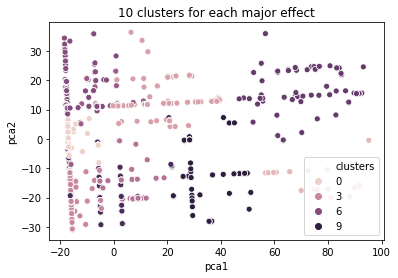

In [47]:
reduced_data = PCA(n_components = 2).fit_transform(data)

results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('10 clusters for each major effect')
plt.show()